In [40]:
import pandas as pd
import numpy as np
from shapely import geometry
%matplotlib inline
import os
from matplotlib import pyplot as plt
from skimage.draw import circle



In [41]:
# Read file in
data = pd.read_table('files/MP-4_[64748,12998]_cell_seg_data.txt')

# Split by phenotype
CD34_df = data.loc[data['Phenotype'] == 'CD34']
CD38_df = data.loc[data['Phenotype'] == 'CD38']
CD90_df = data.loc[data['Phenotype'] == 'CD90']
DAPI_df = data.loc[data['Phenotype'] == 'DAPI']

In [94]:
# plot coordinates of cells in dataframe
def plot_coord(x):
    cell_x = x[['Cell X Position']]
    cell_y = x[['Cell Y Position']]
    phenotype = x[['Phenotype']]

    x_list = cell_x['Cell X Position'].tolist()
    y_list = cell_y['Cell Y Position'].tolist()
    xy_list = zip(x_list,y_list)
    
    radii = [10]*len(x_list)
    img = np.zeros((5000,3000), dtype=np.bool)

    for x,y,z in zip(x_list,y_list,radii):
        rr, cc = circle(x,y,z)
        img[rr,cc] = 1
    plt.imshow(img)

def point_to_coord(points,circle_buffer,coord_dump):
    for point in points:
        if point.within(circle_buffer):
            #print point,'this point is within:',dapi
            coord_array = np.array(point)
            coord_list = coord_array.tolist()
            coord_dump.append(coord_list)    
            
# plot coordinates of cells in dataframe
def return_xy(x,y):
    cell_x = x[['Cell X Position']]
    cell_y = x[['Cell Y Position']]
    phenotype = x[['Phenotype']]

    x_list = cell_x['Cell X Position'].tolist()
    y_list = cell_y['Cell Y Position'].tolist()
    xy_list = zip(x_list,y_list)
    xy_points = [geometry.Point(x) for x in xy_list]
    if y == 'points':
        return(xy_points)
    if y == 'coords':
        return(xy_list)

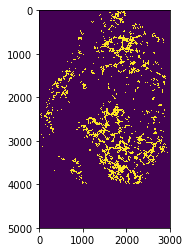

In [43]:
plot_coord(CD34_df)

In [44]:
distance = 8000
circle_buffer = point_1.buffer(distance)

if point_2.within(circle_buffer):
    print('point 2 is within the distance buffer of point 1')



NameError: name 'point_1' is not defined

In [48]:
cd34_points = return_xy(CD34_df,'points')
cd38_points = return_xy(CD38_df,'points')
cd90_points = return_xy(CD90_df,'points')
dapi_points = return_xy(DAPI_df,'points')

all_points = return_xy(data,'points')

cd90_coords = return_xy(CD90_df,'coords')

In [112]:


lol_what = {}


# For each CD90 Cell - Check to see population of cells around it
def cell_count(cell_points,dikt_dump,distance):
    for cell in cell_points:
        # Set circle buffer around cd90 cell
        distance = distance
        circle_buffer = cell.buffer(distance)
        cell_coord = np.array(cell)
        test = str(cell_coord)

        dapi_cells = []
        cd34_cells = []
        cd38_cells = []
        cd90_cells = []

        point_to_coord(dapi_points,circle_buffer,dapi_cells)
        point_to_coord(cd34_points,circle_buffer,cd34_cells)
        point_to_coord(cd38_points,circle_buffer,cd38_cells)
        point_to_coord(cd90_points,circle_buffer,cd90_cells)
        
        final_value = [len(dapi_cells),len(cd34_cells),len(cd38_cells),len(cd90_cells)]
        dikt_dump[test] = final_value



In [116]:
cell_count(cd38_points,lol_what,300)

In [133]:
dapi_num = [values[0] for values in lol_what.values()]
cd34_num = [values[1] for values in lol_what.values()]
cd38_num = [values[2] for values in lol_what.values()]
cd90_num = [values[3] for values in lol_what.values()]


In [ ]:
x = np.random.normal(size=100)
sns.distplot(x);

In [154]:
cd34_num

[7,
 131,
 119,
 107,
 57,
 166,
 381,
 107,
 108,
 66,
 107,
 304,
 312,
 105,
 57,
 57,
 118,
 27,
 384,
 412,
 419,
 305,
 436,
 133,
 324,
 232,
 237,
 328,
 100,
 42,
 55,
 106,
 119,
 399,
 247,
 297,
 316,
 102,
 261,
 174,
 130,
 394,
 113,
 27,
 248,
 51,
 38,
 263,
 385,
 355,
 143,
 172,
 215,
 292,
 92,
 62,
 335,
 203,
 409,
 107,
 68,
 386,
 285,
 327,
 198,
 219,
 380,
 82,
 362,
 101,
 253,
 402,
 250,
 108,
 181,
 74,
 126,
 193,
 389,
 243,
 353,
 110,
 225,
 91,
 45,
 287,
 249,
 120,
 34,
 185,
 277,
 316,
 266,
 105,
 123,
 92,
 33,
 18,
 314,
 184,
 4,
 42,
 81,
 314,
 227,
 30,
 445,
 60,
 110,
 282,
 77,
 5,
 123,
 64,
 298,
 76,
 36,
 173,
 97,
 204,
 341,
 101,
 90,
 248,
 258,
 179,
 139,
 306,
 104,
 342,
 35,
 272,
 391,
 291,
 266,
 145,
 287,
 312,
 80,
 323,
 393,
 116,
 280,
 154,
 54,
 109,
 105,
 131,
 107,
 323,
 206,
 328,
 314,
 64,
 290,
 194,
 159,
 4,
 72,
 383,
 387,
 201,
 55,
 88,
 397,
 72,
 49,
 430,
 86,
 211,
 222,
 62,
 105,
 144,
 37,
 

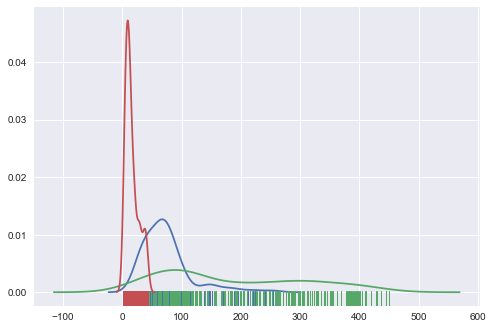

In [174]:

sns.distplot(dapi_num, hist=False, rug=True)
sns.distplot(cd34_num, hist=False, rug=True)
sns.distplot(cd38_num, hist=False, rug=True)
#sns.distplot(cd90_num, hist=False, rug=True)
sns.plt.show()


In [143]:
cd38_num

[6,
 8,
 13,
 7,
 8,
 13,
 28,
 13,
 14,
 19,
 11,
 37,
 43,
 16,
 6,
 3,
 13,
 6,
 41,
 43,
 41,
 4,
 41,
 8,
 30,
 38,
 10,
 28,
 8,
 5,
 6,
 20,
 11,
 30,
 5,
 13,
 32,
 13,
 13,
 4,
 14,
 29,
 15,
 6,
 11,
 6,
 17,
 35,
 25,
 30,
 18,
 16,
 13,
 12,
 12,
 6,
 12,
 8,
 40,
 13,
 6,
 23,
 23,
 35,
 19,
 20,
 23,
 6,
 36,
 10,
 29,
 40,
 19,
 9,
 14,
 19,
 5,
 8,
 25,
 10,
 28,
 8,
 10,
 4,
 21,
 37,
 15,
 11,
 18,
 7,
 20,
 31,
 30,
 10,
 13,
 11,
 4,
 3,
 26,
 11,
 2,
 8,
 20,
 19,
 13,
 3,
 41,
 7,
 9,
 37,
 21,
 4,
 11,
 3,
 20,
 9,
 20,
 14,
 13,
 9,
 34,
 11,
 7,
 14,
 13,
 6,
 1,
 12,
 8,
 35,
 5,
 18,
 28,
 9,
 18,
 17,
 12,
 38,
 17,
 30,
 25,
 13,
 20,
 18,
 3,
 13,
 13,
 8,
 9,
 28,
 10,
 21,
 28,
 3,
 20,
 5,
 9,
 3,
 8,
 11,
 28,
 10,
 7,
 13,
 41,
 11,
 5,
 28,
 8,
 9,
 10,
 6,
 13,
 18,
 21,
 16,
 3,
 38,
 8,
 13,
 13,
 39,
 8,
 2,
 11,
 22,
 11,
 7,
 6,
 12,
 8,
 11,
 6,
 18,
 11,
 13,
 30,
 16,
 35,
 13,
 11,
 9,
 21,
 5,
 14,
 7,
 8,
 19,
 29,
 6,
 10,
 5,
 5,
 39,
 

In [128]:
target_0[['sepal length (cm)']]

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9
